<a href="https://colab.research.google.com/github/samir98441/GRIP-Spark-Foundation/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-01**

NAME : SAMEER KAYASTHA

Topic : To predict the percentage of marks scored by an student based on the number of study hours using Simple Linear Regression

In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#Loading dataset
df=pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [39]:
#Total no of rows and columns in dataset
df.shape

(25, 2)

The dataset is having 25 rows and 2 columns

In [40]:
#checking null valuses
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since the dataset does not have missing values so we dont need to go for handling missing data

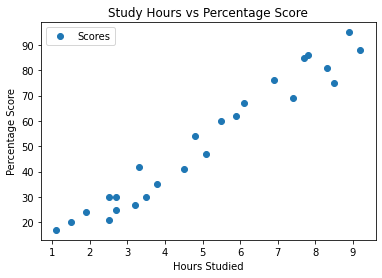

In [41]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [42]:
#data preparation dividing dependent and independent variables
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [43]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
print(X_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [45]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [46]:
print(Y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [47]:
print(Y_test)

[20 27 69 30 62]


In [48]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()

#training the model
regressor.fit(X_train,Y_train) 
y_pred=regressor.predict(X_test)

In [49]:
#Visualizing Actual vs predicted values
comp=pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


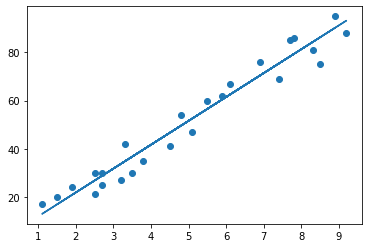

In [50]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [56]:
#Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


Since Mean Absolute Error is 4.1 which is near to zero. Therefore, the we can conider the model as good fit.

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [52]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


***Result: The percentage of mark scored by the student one who studied for 9.25 hours is 93.69 percent***